<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install scikit-learn

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 108.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 110.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 108.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 127.4 MB/s eta 0:00:0000:01


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-05-29 20:41:39--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  47.5MB/s    in 3.2s    

2025-05-29 20:41:43 (48.2 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ... JobSatPoints_6  \
0                                                NaN  ...            NaN   
1  Technical documentation;Blogs;Books;Written Tu...  ...            0.0   
2  Technical documentation;Blogs;Books;Written Tu...  ...            NaN   
3  Stack Overflow;How-to videos;Interactive tutorial  ...            NaN   
4  Technical documentation;Blogs;Written Tutorial...  ...            NaN   

  JobSatPoints_7 JobSatPoints_8 JobSatPoints_9 JobSatPoints_10  \
0            NaN            NaN            NaN             NaN   
1            0.0            0.0            0.0             0.0   
2            NaN            NaN            NaN             NaN   
3            NaN            NaN            NaN             NaN   
4            NaN            NaN            NaN             NaN   

  JobSatPoints_11           SurveyLength SurveyEase ConvertedCompYearly JobSat  
0             NaN                    NaN        NaN                 NaN    NaN  
1             0.0                    NaN        NaN                 NaN    NaN  
2             NaN  Appropriate in length       Easy                 NaN    NaN  
3             NaN               Too long       Easy                 NaN    NaN  
4             NaN              Too short       Easy                 NaN    NaN  

[5 rows x 114 columns]

### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


In [4]:
# Step 1: Map age ranges to approximate midpoints
age_midpoints = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Step 2: Create new numeric age column
df['AgeNumeric'] = df['Age'].map(age_midpoints)

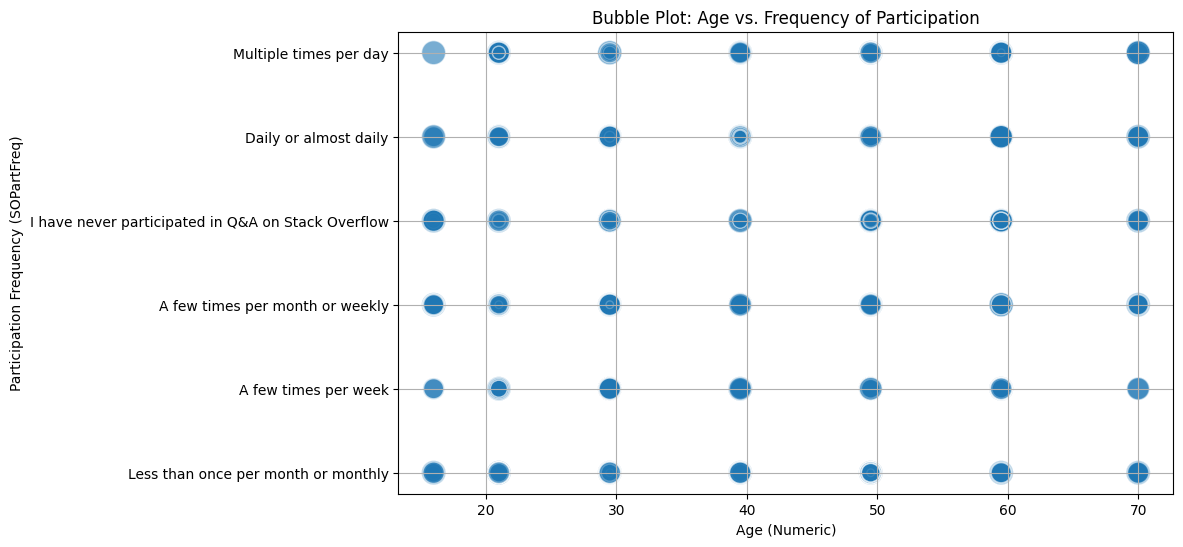

In [7]:
##Write your code here
import matplotlib.pyplot as plt

# Remove rows with missing values in the relevant columns
plot_data = df[['AgeNumeric', 'SOPartFreq', 'JobSat']].dropna()

# Create the bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(
    plot_data['AgeNumeric'], 
    plot_data['SOPartFreq'], 
    s=plot_data['JobSat'] * 30,  # Adjust multiplier for bubble size
    alpha=0.6,
    edgecolors='w'
)

plt.title('Bubble Plot: Age vs. Frequency of Participation')
plt.xlabel('Age (Numeric)')
plt.ylabel('Participation Frequency (SOPartFreq)')
plt.grid(True)
plt.show()


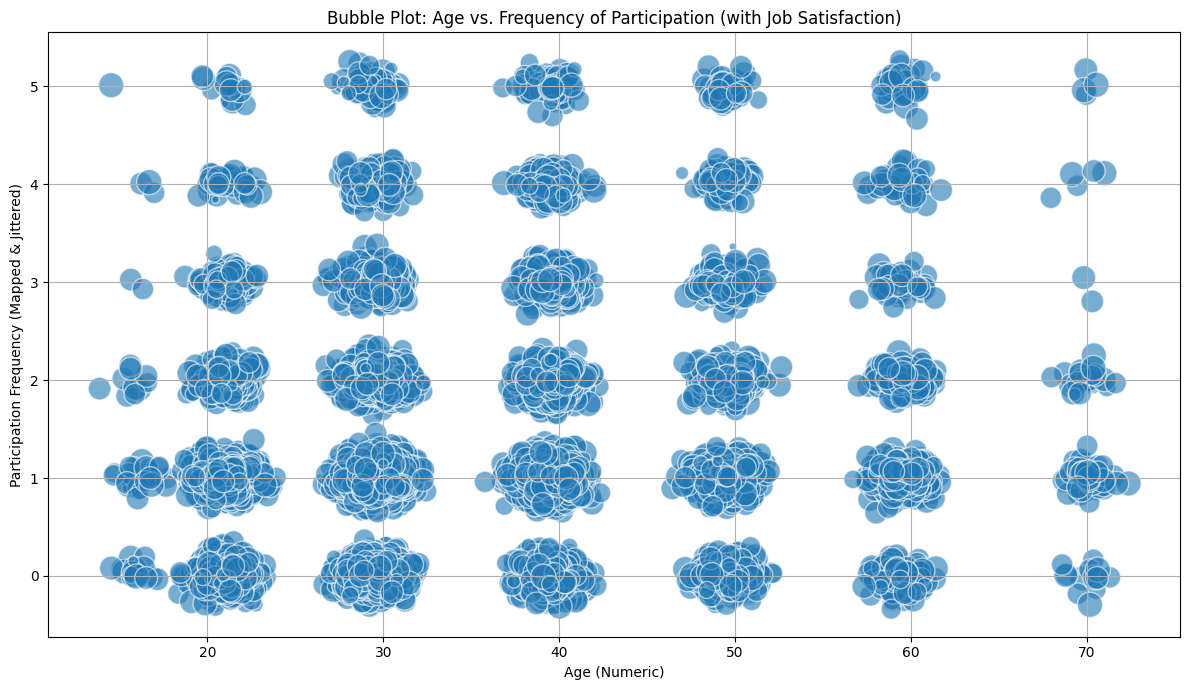

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Drop missing values
plot_data = df[['AgeNumeric', 'SOPartFreq', 'JobSat']].dropna()

# Step 2: Map SOPartFreq to numeric values
sopartfreq_map = {
    'Multiple times per day': 5,
    'Daily or almost daily': 4,
    'A few times per week': 3,
    'A few times per month or weekly': 2,
    'Less than once per month or monthly': 1,
    'I have never participated in Q&A on Stack Overflow': 0
}
plot_data['SOPartFreqNumeric'] = plot_data['SOPartFreq'].map(sopartfreq_map)

# Step 3: Normalize JobSat values and scale for bubble size
size = (plot_data['JobSat'] - plot_data['JobSat'].min()) / (plot_data['JobSat'].max() - plot_data['JobSat'].min())
size = size * 300 + 30  # min bubble size 30, max 330

# Step 4: Add jitter to reduce overlap
x_jitter = plot_data['AgeNumeric'] + np.random.normal(0, 0.8, size=len(plot_data))
y_jitter = plot_data['SOPartFreqNumeric'] + np.random.normal(0, 0.1, size=len(plot_data))

# Step 5: Create the bubble plot
plt.figure(figsize=(12, 7))
plt.scatter(x_jitter, y_jitter, s=size, alpha=0.6, edgecolors='w')

# Final plot formatting
plt.title('Bubble Plot: Age vs. Frequency of Participation (with Job Satisfaction)')
plt.xlabel('Age (Numeric)')
plt.ylabel('Participation Frequency (Mapped & Jittered)')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


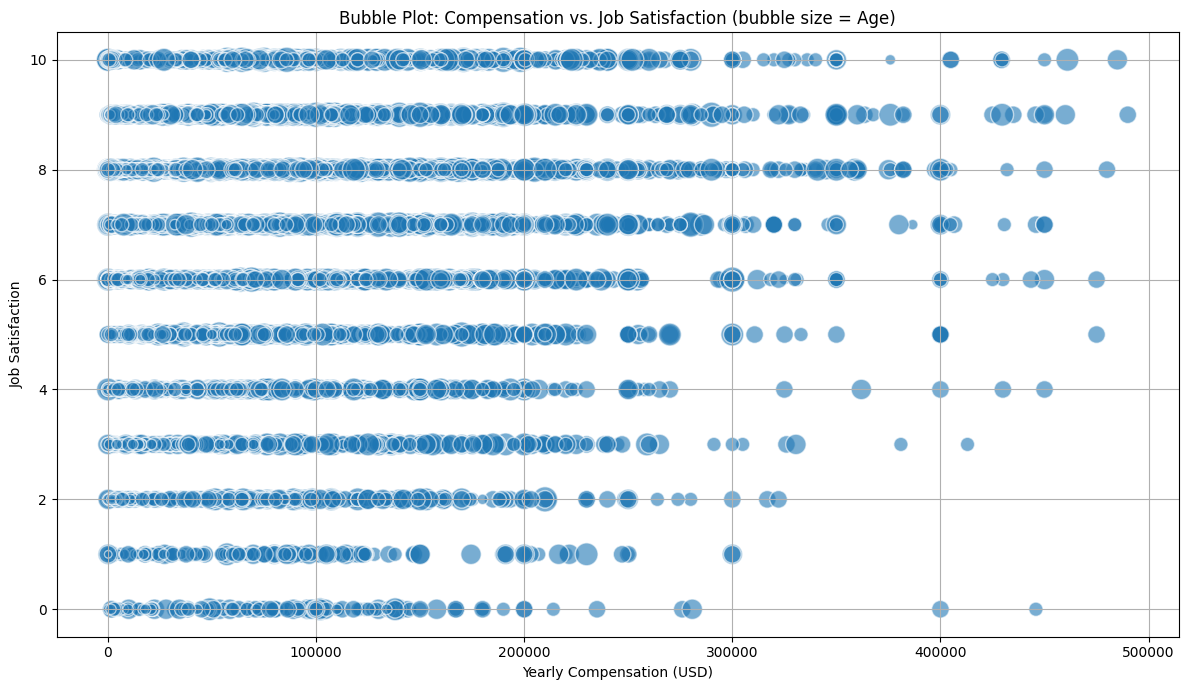

In [10]:
##Write your code here
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Drop missing values
plot_data2 = df[['ConvertedCompYearly', 'JobSat', 'AgeNumeric']].dropna()

# Step 2: Optional - filter out extreme outliers in compensation (e.g., > $500,000)
plot_data2 = plot_data2[plot_data2['ConvertedCompYearly'] < 500000]

# Step 3: Normalize AgeNumeric for bubble sizing
size2 = (plot_data2['AgeNumeric'] - plot_data2['AgeNumeric'].min()) / (plot_data2['AgeNumeric'].max() - plot_data2['AgeNumeric'].min())
size2 = size2 * 300 + 30  # Bubble sizes between 30 and 330

# Step 4: Create the bubble plot
plt.figure(figsize=(12, 7))
plt.scatter(
    plot_data2['ConvertedCompYearly'], 
    plot_data2['JobSat'], 
    s=size2, 
    alpha=0.6, 
    edgecolors='w'
)

# Step 5: Final plot formatting
plt.title('Bubble Plot: Compensation vs. Job Satisfaction (bubble size = Age)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


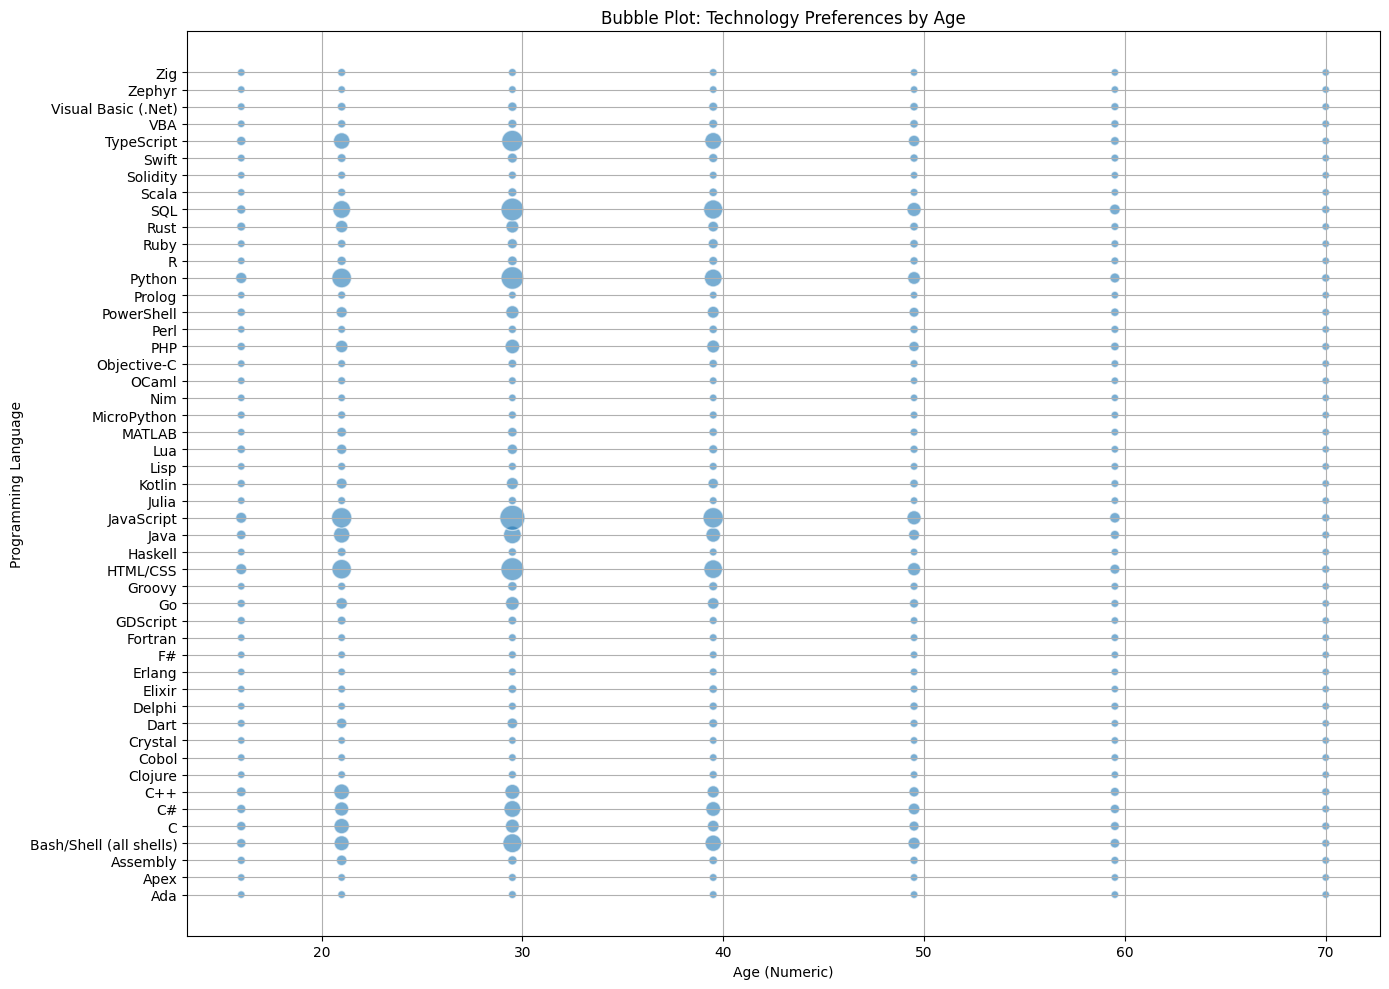

In [11]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Drop missing data
lang_data = df[['AgeNumeric', 'LanguageHaveWorkedWith']].dropna()

# Step 2: Split languages into separate rows
lang_data = lang_data.assign(Language=lang_data['LanguageHaveWorkedWith'].str.split(';')).explode('Language')

# Step 3: Group by AgeNumeric and Language, then count
lang_counts = lang_data.groupby(['AgeNumeric', 'Language']).size().reset_index(name='Count')

# Step 4: Normalize counts for bubble sizes
lang_counts['Size'] = (lang_counts['Count'] - lang_counts['Count'].min()) / (lang_counts['Count'].max() - lang_counts['Count'].min())
lang_counts['Size'] = lang_counts['Size'] * 300 + 30

# Step 5: Create bubble plot
plt.figure(figsize=(14, 10))
plt.scatter(
    lang_counts['AgeNumeric'],
    lang_counts['Language'],
    s=lang_counts['Size'],
    alpha=0.6,
    edgecolors='w'
)

# Plot formatting
plt.title('Bubble Plot: Technology Preferences by Age')
plt.xlabel('Age (Numeric)')
plt.ylabel('Programming Language')
plt.grid(True)
plt.tight_layout()
plt.show()


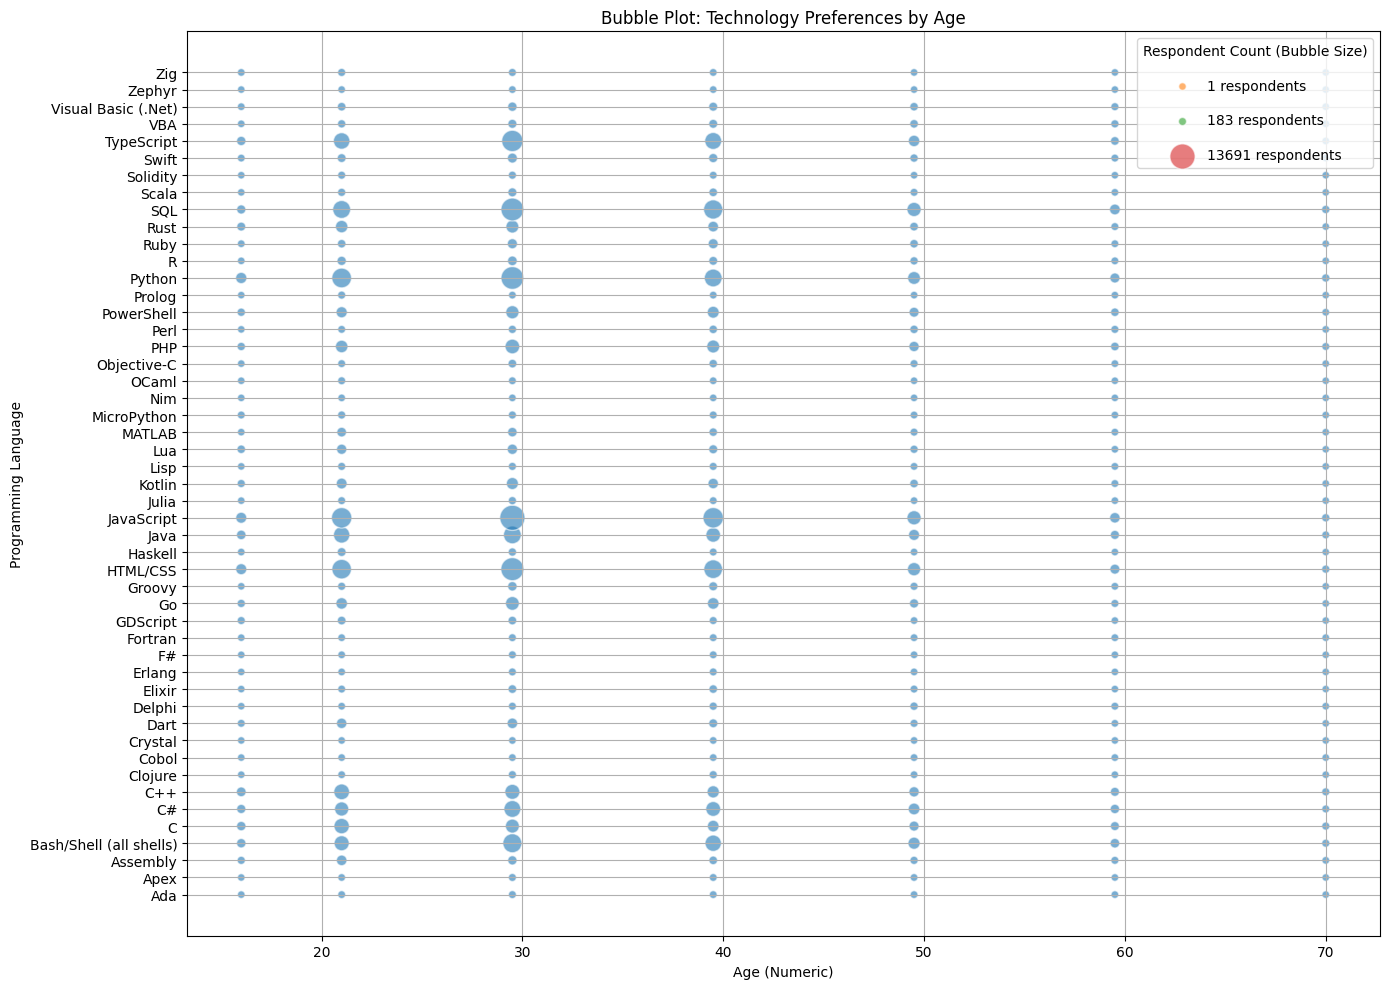

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Drop missing data
lang_data = df[['AgeNumeric', 'LanguageHaveWorkedWith']].dropna()

# Step 2: Split languages into separate rows
lang_data = lang_data.assign(Language=lang_data['LanguageHaveWorkedWith'].str.split(';')).explode('Language')

# Step 3: Group by AgeNumeric and Language, then count
lang_counts = lang_data.groupby(['AgeNumeric', 'Language']).size().reset_index(name='Count')

# Step 4: Normalize counts for bubble sizes
min_count = lang_counts['Count'].min()
median_count = lang_counts['Count'].median()
max_count = lang_counts['Count'].max()

def scale_bubble_size(count):
    return (count - min_count) / (max_count - min_count) * 300 + 30

lang_counts['Size'] = lang_counts['Count'].apply(scale_bubble_size)

# Step 5: Create the bubble plot
plt.figure(figsize=(14, 10))
scatter = plt.scatter(
    lang_counts['AgeNumeric'],
    lang_counts['Language'],
    s=lang_counts['Size'],
    alpha=0.6,
    edgecolors='w'
)

# Step 6: Add custom legend for bubble sizes
for val in [min_count, median_count, max_count]:
    plt.scatter([], [], s=scale_bubble_size(val), label=f'{int(val)} respondents', alpha=0.6, edgecolors='w')

plt.legend(title='Respondent Count (Bubble Size)', scatterpoints=1, frameon=True, labelspacing=1.5, loc='upper right')

# Final formatting
plt.title('Bubble Plot: Technology Preferences by Age')
plt.xlabel('Age (Numeric)')
plt.ylabel('Programming Language')
plt.grid(True)
plt.tight_layout()
plt.show()



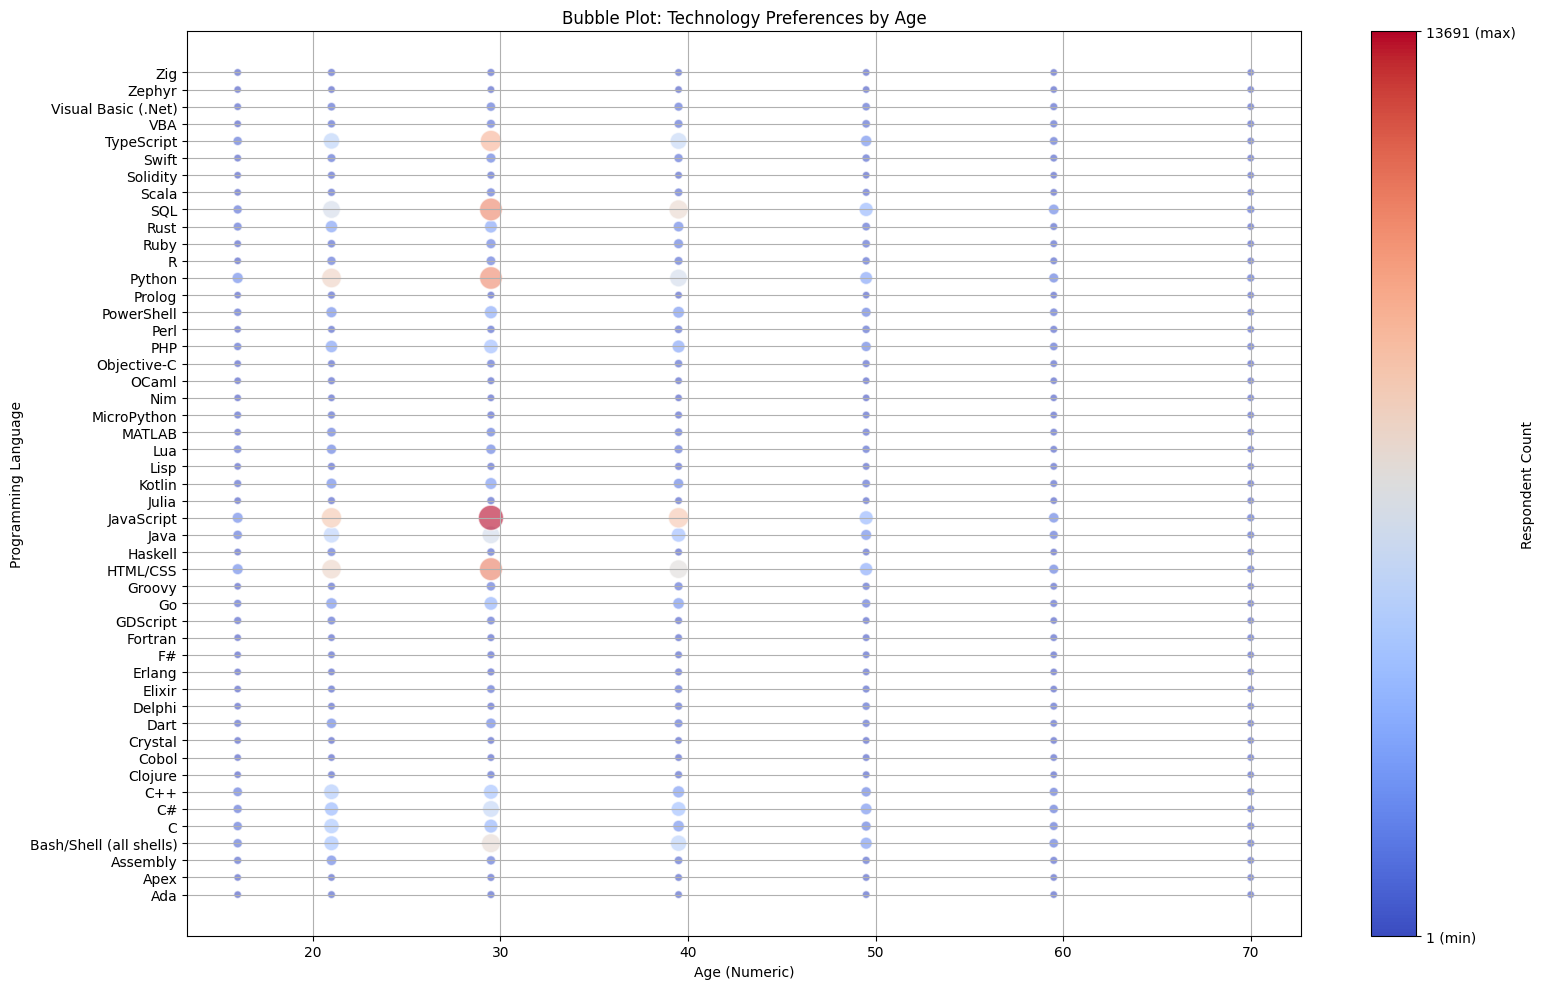

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Step 1: Clean and prepare the data
lang_data = df[['AgeNumeric', 'LanguageHaveWorkedWith']].dropna()
lang_data = lang_data.assign(Language=lang_data['LanguageHaveWorkedWith'].str.split(';')).explode('Language')
lang_counts = lang_data.groupby(['AgeNumeric', 'Language']).size().reset_index(name='Count')

# Step 2: Normalize bubble size
min_count = lang_counts['Count'].min()
max_count = lang_counts['Count'].max()

def scale_size(count):
    return (count - min_count) / (max_count - min_count) * 300 + 30

lang_counts['Size'] = lang_counts['Count'].apply(scale_size)

# Step 3: Normalize count for color mapping
norm = mcolors.Normalize(vmin=min_count, vmax=max_count)
cmap = cm.coolwarm
colors = cmap(norm(lang_counts['Count']))

# Step 4: Plot the bubble chart
fig, ax = plt.subplots(figsize=(16, 10))
scatter = ax.scatter(
    lang_counts['AgeNumeric'],
    lang_counts['Language'],
    s=lang_counts['Size'],
    c=colors,
    alpha=0.6,
    edgecolors='w'
)

# Step 5: Add colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Needed only for colorbar without an image
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Respondent Count')
cbar.set_ticks([min_count, max_count])
cbar.set_ticklabels([f'{int(min_count)} (min)', f'{int(max_count)} (max)'])

# Step 6: Final formatting
ax.set_title('Bubble Plot: Technology Preferences by Age')
ax.set_xlabel('Age (Numeric)')
ax.set_ylabel('Programming Language')
ax.grid(True)
plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


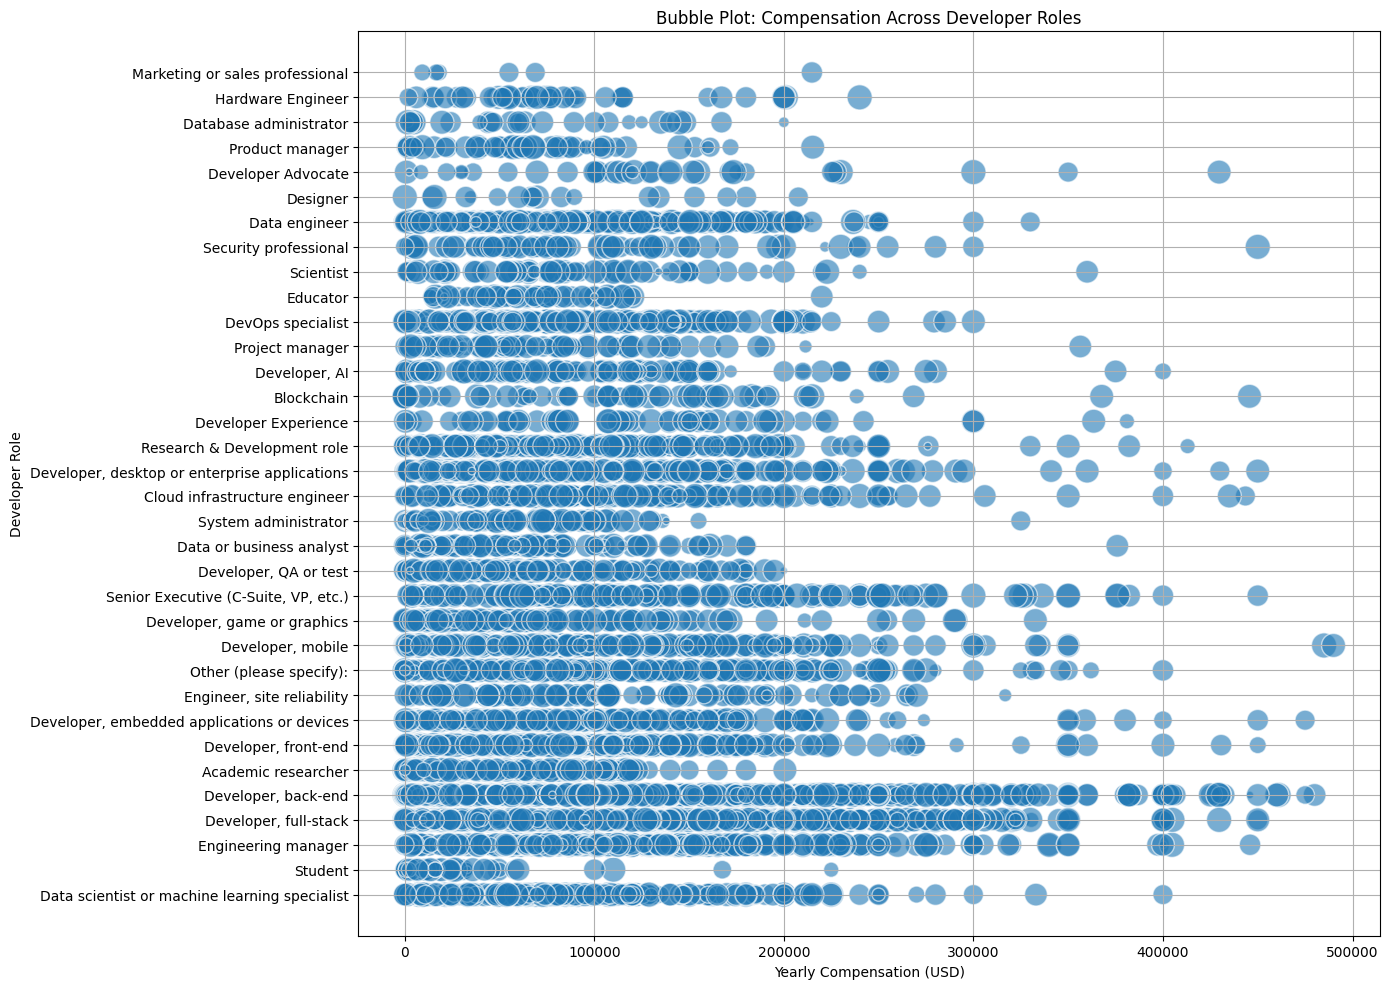

In [18]:
##Write your code here
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Filter and clean
role_data = df[['ConvertedCompYearly', 'DevType', 'JobSat']].dropna()
role_data = role_data[role_data['ConvertedCompYearly'] < 500000]  # remove outliers

# Step 2: Normalize JobSat for bubble size
min_js, max_js = role_data['JobSat'].min(), role_data['JobSat'].max()
role_data['Size'] = ((role_data['JobSat'] - min_js) / (max_js - min_js)) * 300 + 30

# Step 3: Plot
plt.figure(figsize=(14, 10))
plt.scatter(
    role_data['ConvertedCompYearly'],
    role_data['DevType'],
    s=role_data['Size'],
    alpha=0.6,
    edgecolors='w'
)

plt.title('Bubble Plot: Compensation Across Developer Roles')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Developer Role')
plt.grid(True)
plt.tight_layout()
plt.show()


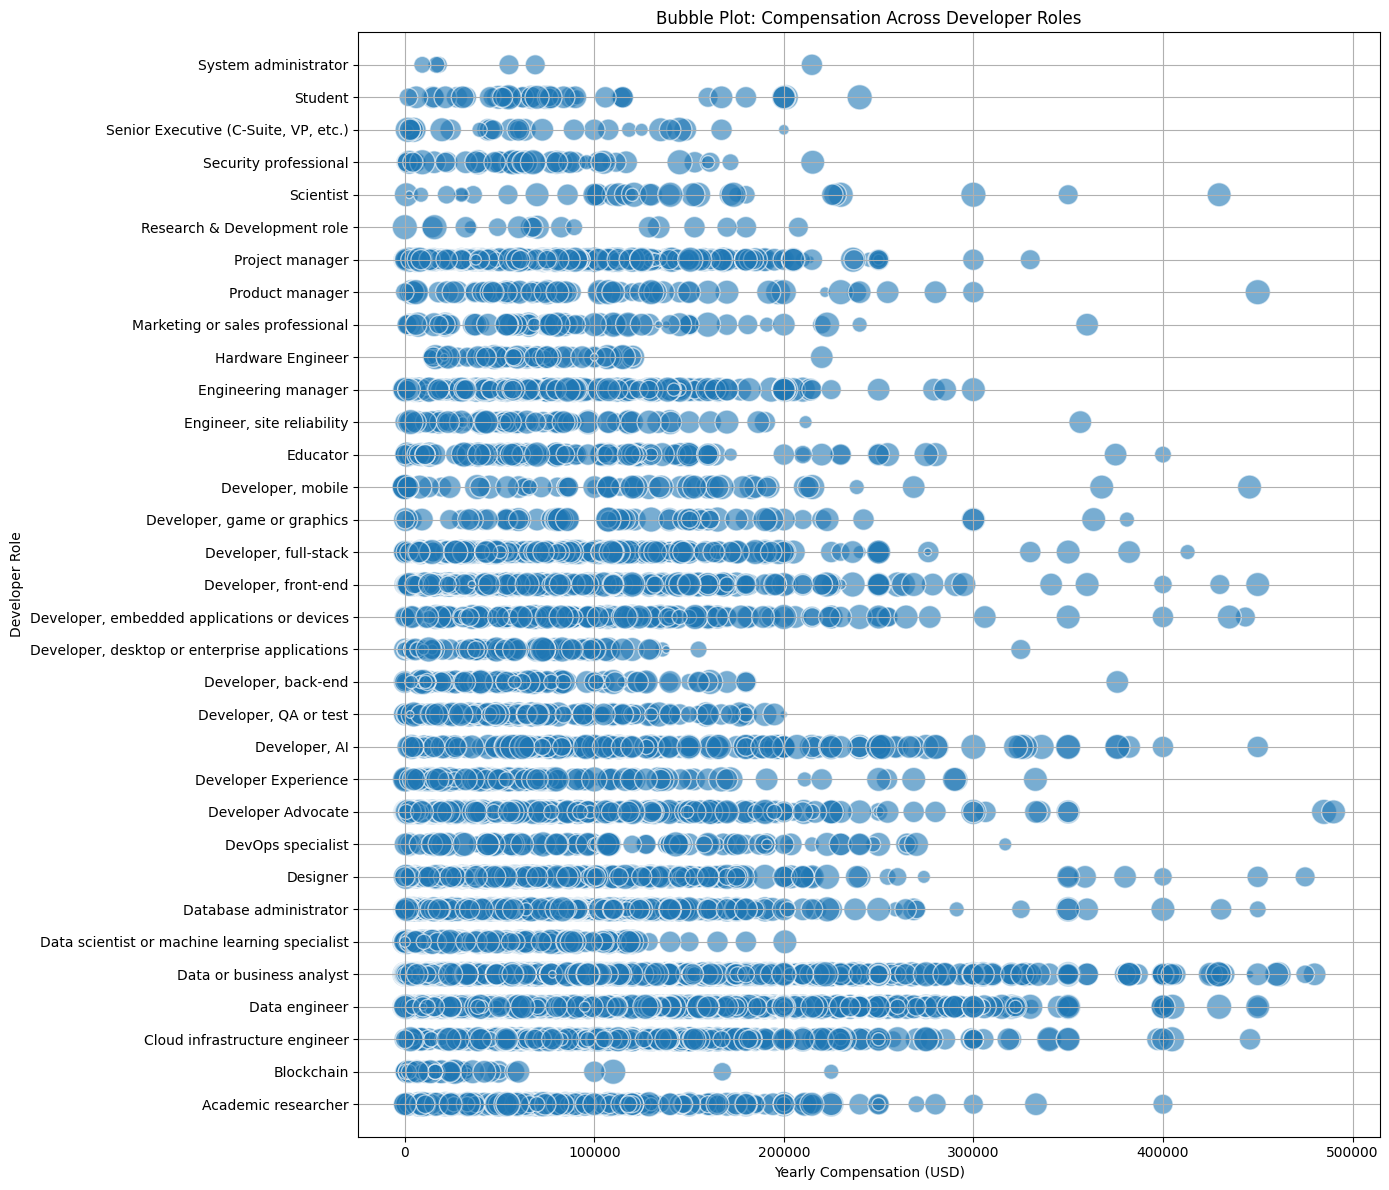

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Filter and clean
role_data = df[['ConvertedCompYearly', 'DevType', 'JobSat']].dropna()
role_data = role_data[role_data['ConvertedCompYearly'] < 500000]

# Step 2: Remove "Other (please specify)"
role_data = role_data[role_data['DevType'] != 'Other (please specify):']

# Step 3: Normalize JobSat for bubble size
min_js, max_js = role_data['JobSat'].min(), role_data['JobSat'].max()
role_data['Size'] = ((role_data['JobSat'] - min_js) / (max_js - min_js)) * 300 + 30

# Step 4: Plot
fig, ax = plt.subplots(figsize=(14, 12))
scatter = ax.scatter(
    role_data['ConvertedCompYearly'],
    role_data['DevType'],
    s=role_data['Size'],
    alpha=0.6,
    edgecolors='w'
)

# Improve y-axis label spacing
devtypes = sorted(role_data['DevType'].unique())
ax.set_yticks(np.arange(len(devtypes)))
ax.set_yticklabels(devtypes)
ax.set_ylim(-1, len(devtypes))  # ensure space for all labels

# Title and axis labels
ax.set_title('Bubble Plot: Compensation Across Developer Roles')
ax.set_xlabel('Yearly Compensation (USD)')
ax.set_ylabel('Developer Role')
ax.grid(True)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


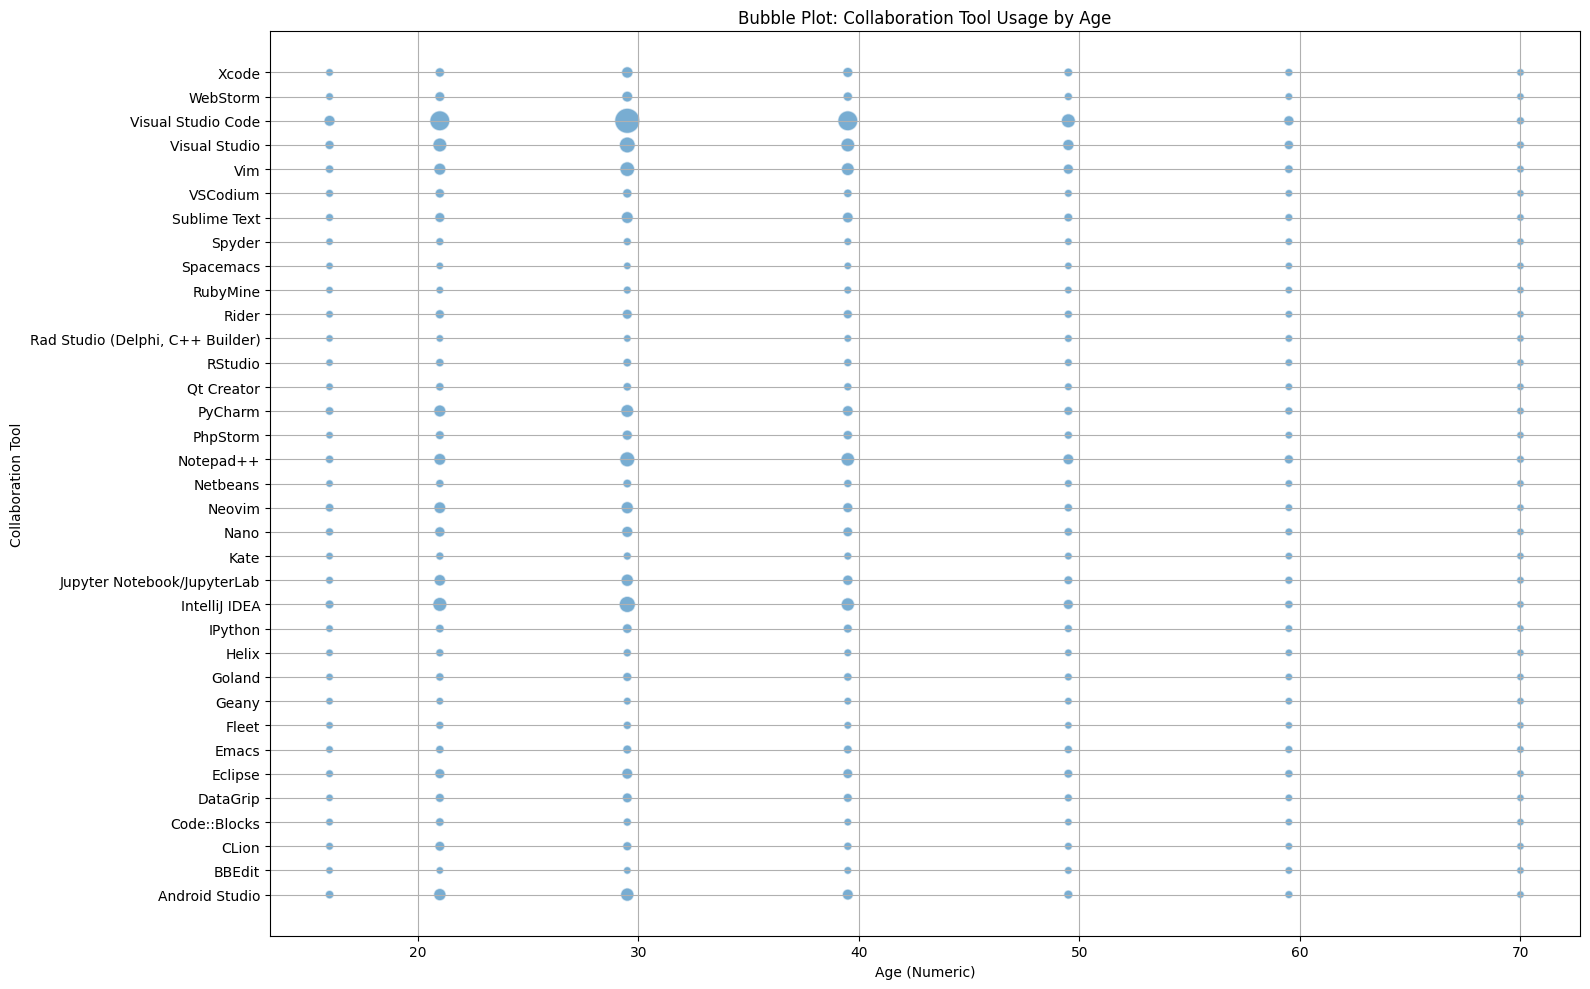

In [20]:
##Write your code here
# Step 1: Expand multi-select responses
tool_data = df[['AgeNumeric', 'NEWCollabToolsHaveWorkedWith']].dropna()
tool_data = tool_data.assign(Tool=tool_data['NEWCollabToolsHaveWorkedWith'].str.split(';')).explode('Tool')

# Step 2: Group by Age and Tool
tool_counts = tool_data.groupby(['AgeNumeric', 'Tool']).size().reset_index(name='Count')

# Step 3: Normalize bubble size
min_ct, max_ct = tool_counts['Count'].min(), tool_counts['Count'].max()
tool_counts['Size'] = ((tool_counts['Count'] - min_ct) / (max_ct - min_ct)) * 300 + 30

# Step 4: Plot
plt.figure(figsize=(16, 10))
plt.scatter(
    tool_counts['AgeNumeric'],
    tool_counts['Tool'],
    s=tool_counts['Size'],
    alpha=0.6,
    edgecolors='w'
)

plt.title('Bubble Plot: Collaboration Tool Usage by Age')
plt.xlabel('Age (Numeric)')
plt.ylabel('Collaboration Tool')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



In [22]:
print(df.columns.to_list())

['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',

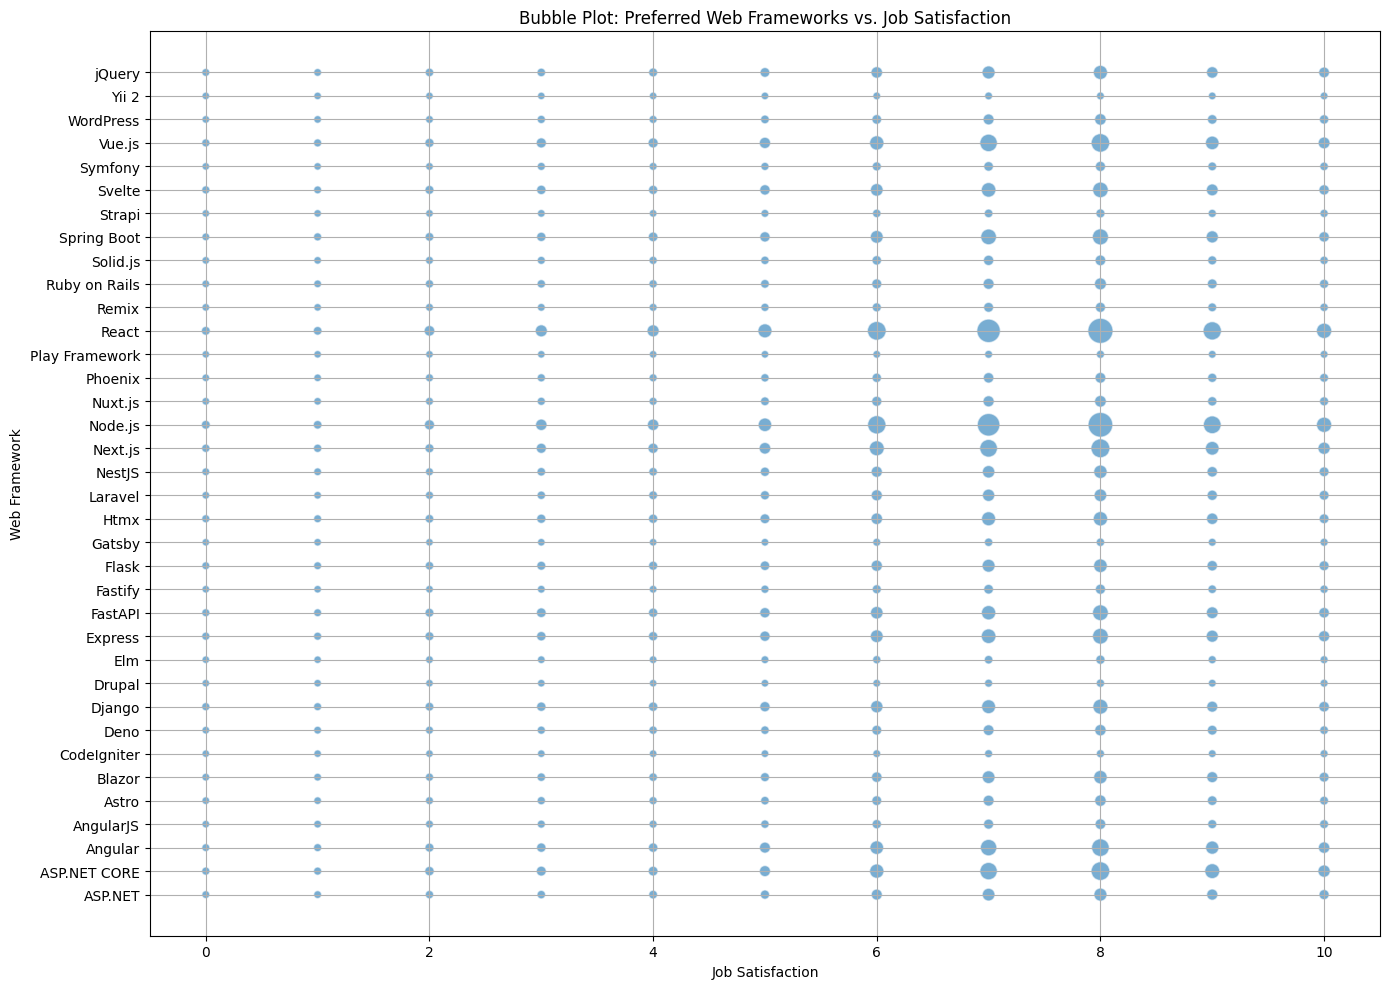

In [23]:
##Write your code here
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Expand multiselect responses
framework_data = df[['WebframeWantToWorkWith', 'JobSat']].dropna()
framework_data = framework_data.assign(Framework=framework_data['WebframeWantToWorkWith'].str.split(';')).explode('Framework')

# Step 2: Group and count
fw_counts = framework_data.groupby(['Framework', 'JobSat']).size().reset_index(name='Count')

# Step 3: Normalize size
min_ct, max_ct = fw_counts['Count'].min(), fw_counts['Count'].max()
fw_counts['Size'] = ((fw_counts['Count'] - min_ct) / (max_ct - min_ct)) * 300 + 30

# Step 4: Plot
plt.figure(figsize=(14, 10))
plt.scatter(
    fw_counts['JobSat'],
    fw_counts['Framework'],
    s=fw_counts['Size'],
    alpha=0.6,
    edgecolors='w'
)

plt.title('Bubble Plot: Preferred Web Frameworks vs. Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Web Framework')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



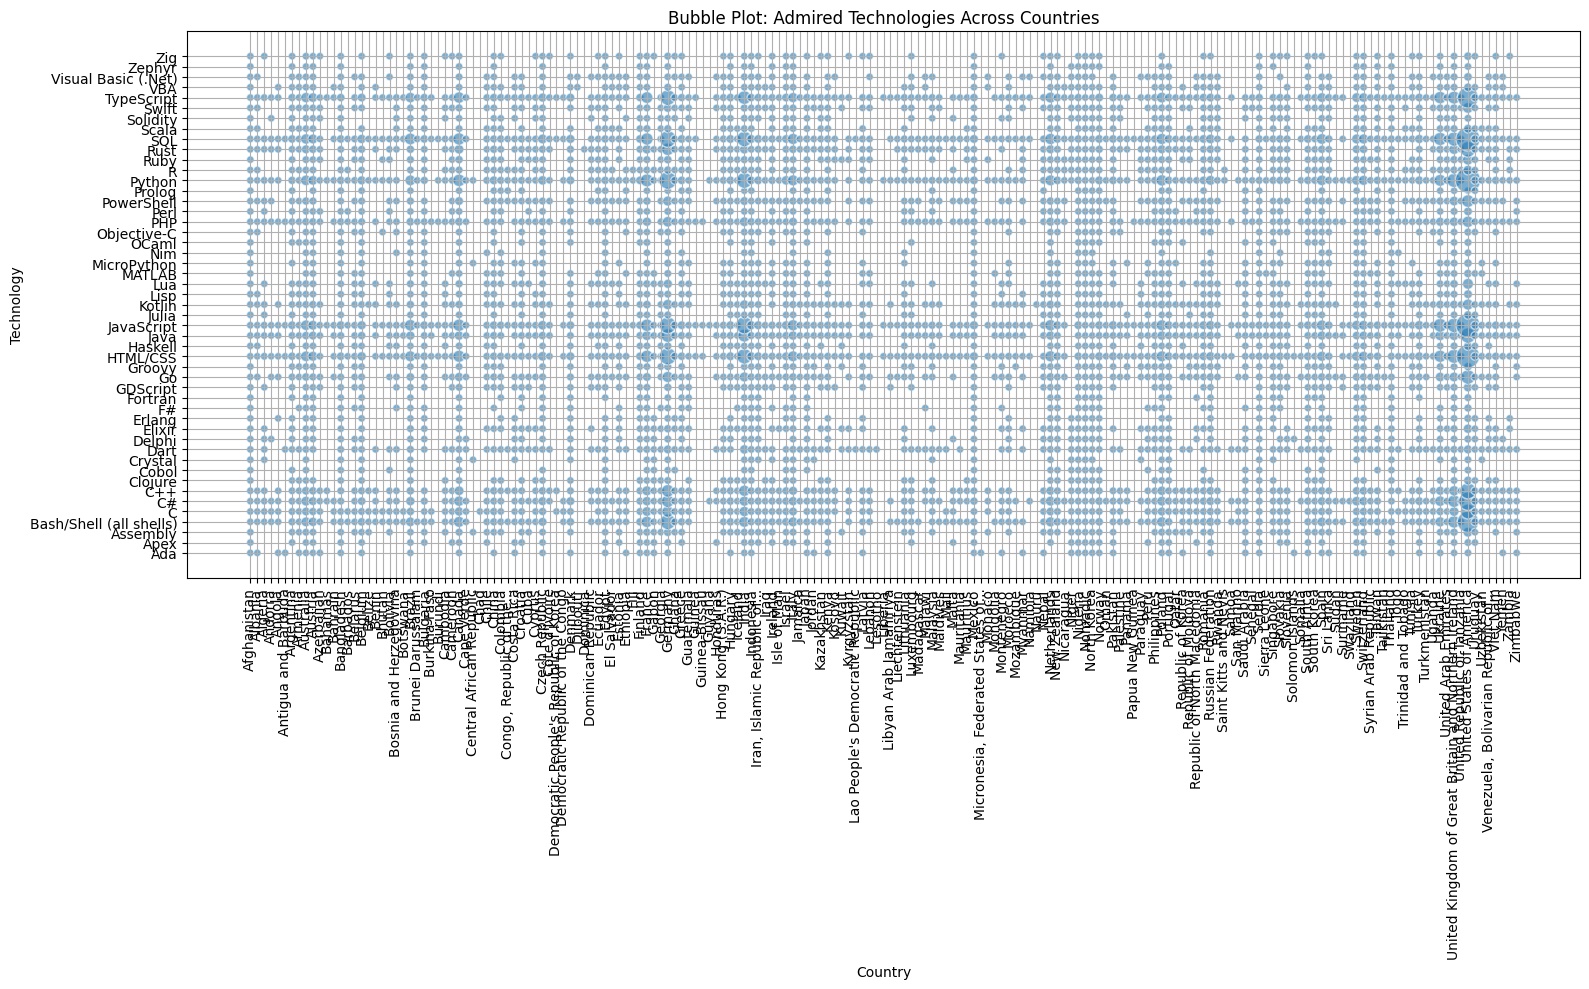

In [24]:
##Write your code here
# Step 1: Expand multiselect responses
admire_data = df[['Country', 'LanguageAdmired']].dropna()
admire_data = admire_data.assign(Technology=admire_data['LanguageAdmired'].str.split(';')).explode('Technology')

# Step 2: Group and count
admire_counts = admire_data.groupby(['Country', 'Technology']).size().reset_index(name='Count')

# Step 3: Normalize bubble size
min_ct, max_ct = admire_counts['Count'].min(), admire_counts['Count'].max()
admire_counts['Size'] = ((admire_counts['Count'] - min_ct) / (max_ct - min_ct)) * 300 + 30

# Step 4: Plot
plt.figure(figsize=(16, 10))
plt.scatter(
    admire_counts['Country'],
    admire_counts['Technology'],
    s=admire_counts['Size'],
    alpha=0.6,
    edgecolors='w'
)

plt.title('Bubble Plot: Admired Technologies Across Countries')
plt.xlabel('Country')
plt.ylabel('Technology')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


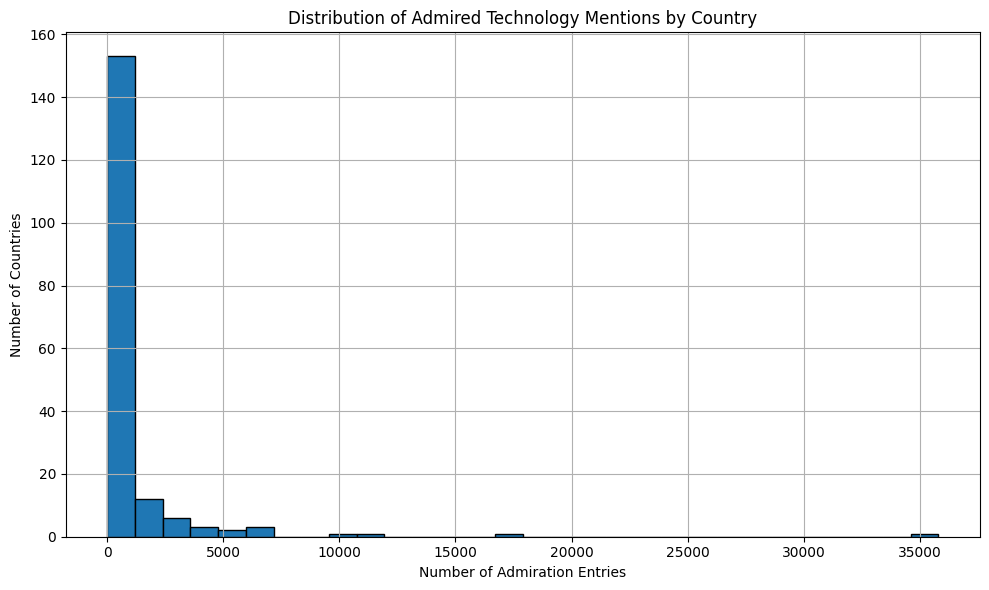

Country  Total Admired Entries
0                            United States of America                  35809
1                                             Germany                  16722
2                                               India                  11568
3   United Kingdom of Great Britain and Northern I...                   9939
4                                              France                   6795
5                                              Canada                   6704
6                                             Ukraine                   6447
7                                         Netherlands                   4971
8                                              Poland                   4828
9                                              Brazil                   4381
10                                              Italy                   4321
11                                          Australia                   4021
12                                              Spain                   3477
13                                             Sweden                   3108
14                                        Switzerland                   3066
15                                            Austria                   2873
16                                 Russian Federation                   2502
17                                     Czech Republic                   2418
18                                            Belgium                   1833
19                                             Turkey                   1674
20                                             Israel                   1642
21                                            Denmark                   1547
22                                            Hungary                   1448
23                                             Norway                   1436
24                                             Mexico                   1341
25                                            Romania                   1323
26                                           Portugal                   1311
27                                          Indonesia                   1311
28                                              China                   1275
29                       Iran, Islamic Republic of...                   1244

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Explode multiselect admiration responses
admire_data = df[['Country', 'LanguageAdmired']].dropna()
admire_data = admire_data.assign(Technology=admire_data['LanguageAdmired'].str.split(';')).explode('Technology')

# Step 2: Count total admiration entries per country
country_counts = admire_data['Country'].value_counts()

# Step 3: Plot histogram of admiration counts by country
plt.figure(figsize=(10, 6))
plt.hist(country_counts, bins=30, edgecolor='black')
plt.title('Distribution of Admired Technology Mentions by Country')
plt.xlabel('Number of Admiration Entries')
plt.ylabel('Number of Countries')
plt.grid(True)
plt.tight_layout()
plt.show()

# Sort and display top 30 countries by admiration entries
top_countries_df = country_counts.reset_index()
top_countries_df.columns = ['Country', 'Total Admired Entries']
top_countries_df.head(30)



## Final Step: Review


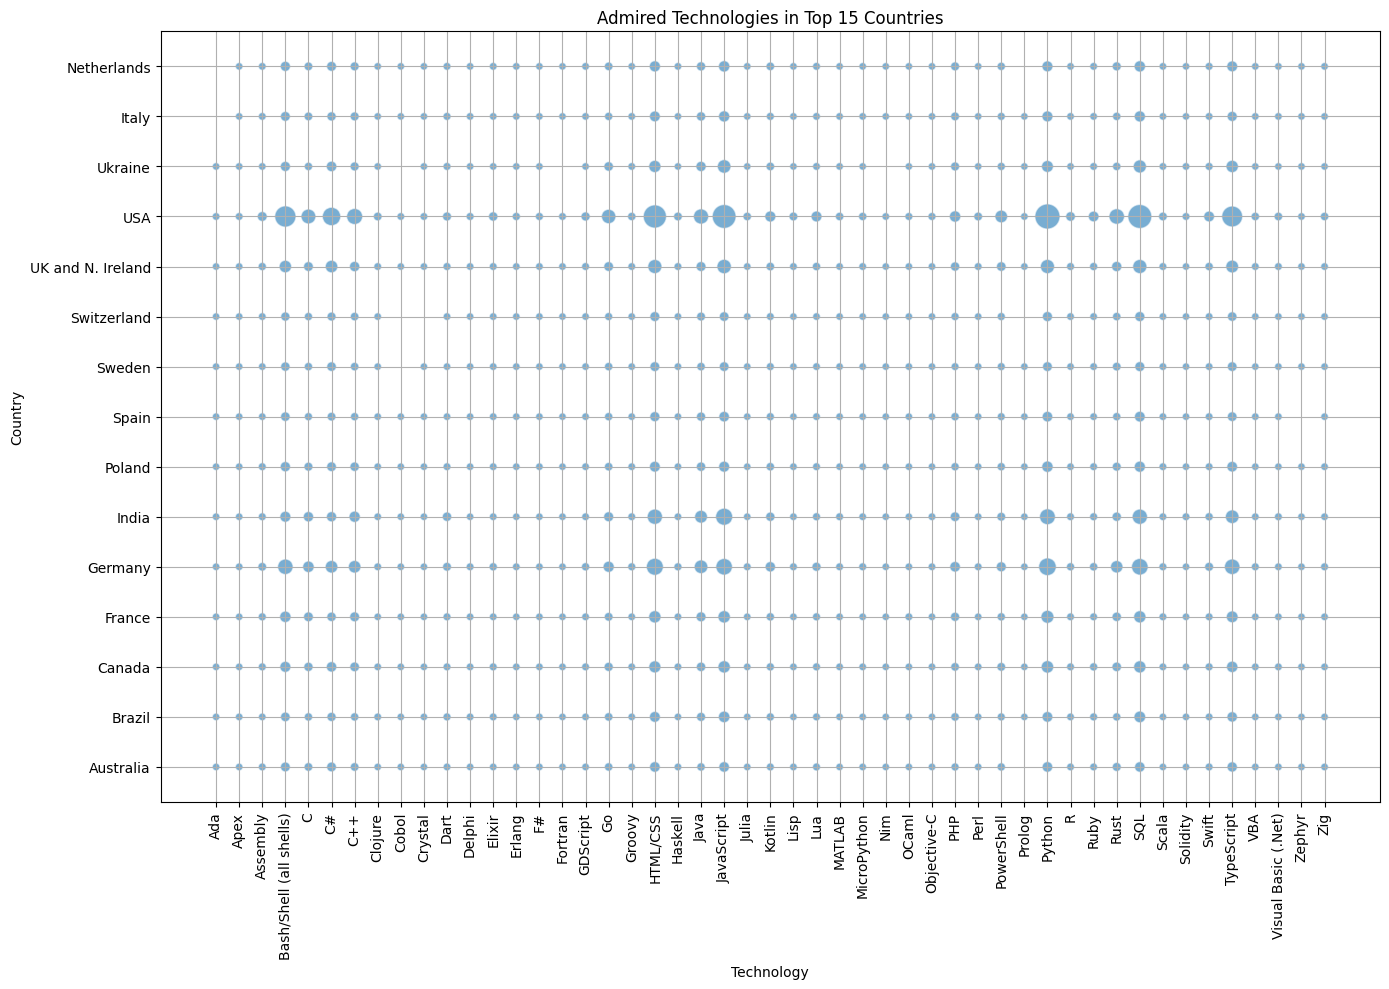

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Explode multiselect responses
admire_data = df[['Country', 'LanguageAdmired']].dropna()
admire_data = admire_data.assign(Technology=admire_data['LanguageAdmired'].str.split(';')).explode('Technology')

# Step 2: Remap selected country names
country_rename = {
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'UK and N. Ireland'
}
admire_data['Country'] = admire_data['Country'].replace(country_rename)

# Step 3: Determine top 15 countries by admiration entries
top_15 = admire_data['Country'].value_counts().head(15).index
filtered_data = admire_data[admire_data['Country'].isin(top_15)]

# Step 4: Group and count
admire_counts = filtered_data.groupby(['Technology', 'Country']).size().reset_index(name='Count')

# Step 5: Normalize for bubble size
min_ct, max_ct = admire_counts['Count'].min(), admire_counts['Count'].max()
admire_counts['Size'] = ((admire_counts['Count'] - min_ct) / (max_ct - min_ct)) * 300 + 30

# Step 6: Plot (transposed for readability)
plt.figure(figsize=(14, 10))
plt.scatter(
    admire_counts['Technology'],
    admire_counts['Country'],
    s=admire_counts['Size'],
    alpha=0.6,
    edgecolors='w'
)

plt.title('Admired Technologies in Top 15 Countries')
plt.xlabel('Technology')
plt.ylabel('Country')
plt.xticks(rotation=90, ha='center')
plt.grid(True)
plt.tight_layout()
plt.show()


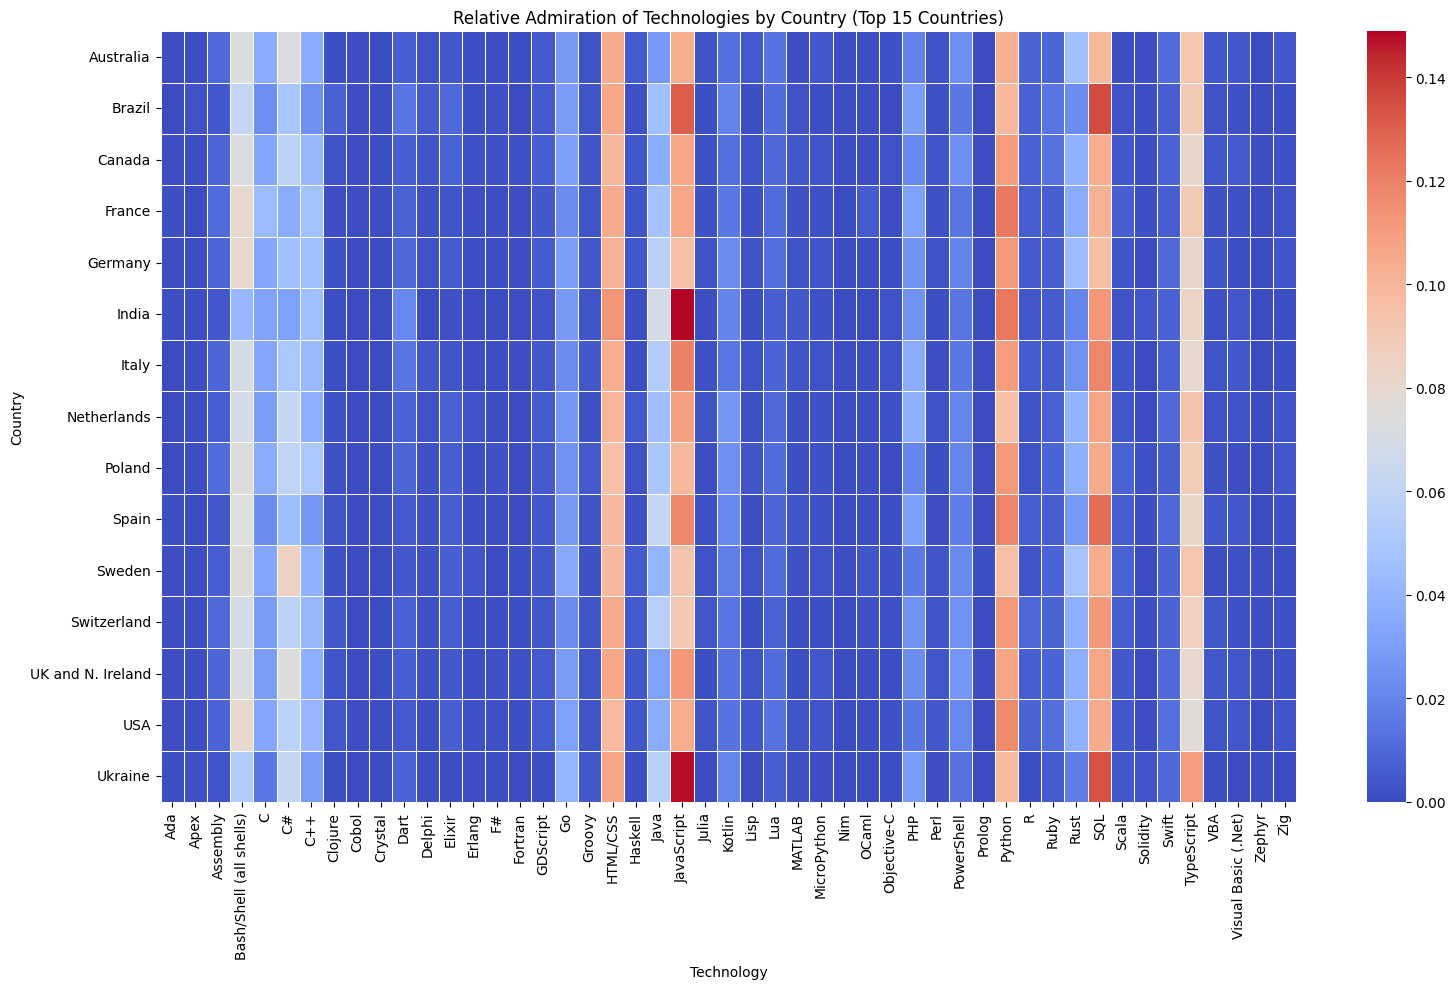

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Explode multi-response admiration field
admire_data = df[['Country', 'LanguageAdmired']].dropna()
admire_data = admire_data.assign(Technology=admire_data['LanguageAdmired'].str.split(';')).explode('Technology')

# Step 2: Remap country names
country_rename = {
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'UK and N. Ireland'
}
admire_data['Country'] = admire_data['Country'].replace(country_rename)

# Step 3: Keep only top 15 countries
top_15 = admire_data['Country'].value_counts().head(15).index
filtered_data = admire_data[admire_data['Country'].isin(top_15)]

# Step 4: Create a pivot table (country vs technology)
heatmap_data = filtered_data.groupby(['Country', 'Technology']).size().unstack(fill_value=0)

# Step 5: Normalize per country to get relative admiration
normalized_heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

# Step 6: Plot the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(normalized_heatmap_data, cmap='coolwarm', linewidths=0.5)
plt.title("Relative Admiration of Technologies by Country (Top 15 Countries)")
plt.xlabel("Technology")
plt.ylabel("Country")
plt.xticks(rotation=90, ha='center')
plt.tight_layout()
plt.show()


**Many countries share a similar admiration profile to the US**, especially favoring popular languages like **JavaScript**, **Python**, and **TypeScript**. But a few stand out as different:

---

### Notable Differences from the USA:

#### **Germany**

* **High admiration for C** and **C++**, more so than most other countries including the USA
* Strong representation for **TypeScript** and **Rust**, similar to the USA, but admiration for **Java** seems slightly higher than average

#### **India**

* Shows **strong admiration for Java**, possibly stronger than in the USA
* Admiration for **C** and **C++** is also relatively high — similar to Germany
* **Python** and **JavaScript** are still prominent, but the spread suggests more weight on “traditional” languages

#### **Brazil**

* Appears to have **more modest admiration across the board**, possibly a smaller sample
* Admiration for **JavaScript** and **Python** is present, but other bubbles are smaller — indicating a less diverse admiration profile

#### **Switzerland**

* Admiration for **Go**, **Rust**, and **TypeScript** is relatively more prominent compared to the USA
* Also shows admiration for **Haskell**, which is more niche and not strongly represented in the USA bubble sizes

#### **Sweden**

* Slight boost in admiration for **Scala**, **Elixir**, and **F#** — more functional language leaning than seen in USA
* Smaller bubble for **PHP**, suggesting it’s less admired there than in some other countries

---

### Summary:

| Country         | Notable Differences                                     |
| --------------- | ------------------------------------------------------- |
| **Germany**     | Higher admiration for C, C++                            |
| **India**       | Strong Java/C++ presence                                |
| **Switzerland** | More admiration for Go, Rust, Haskell                   |
| **Sweden**      | Slightly more admiration for Scala, Elixir, F#          |
| **Brazil**      | Smaller overall distribution; narrower admiration focus |

---

### Confirmed Patterns from the Bubble Plot

#### **India**

* **Very strong relative admiration for Java**, consistent with traditional CS curricula in India
* Also shows slightly higher relative interest in **C** and **C++**

#### **Germany**

* Higher-than-average admiration for **C** and **C++**
* Noticeable appreciation for **TypeScript** and **Rust**

#### **Switzerland**

* Distinct interest in **Rust** and **Go**
* Lower relative admiration for JavaScript than most

#### **Sweden**

* Elevated interest in **Scala**, **F#**, and **Elixir** — functional programming influence is more evident

#### **Brazil**

* While admiration levels are low across the board (as seen in the bubble chart), the normalized view shows stronger relative preference for **JavaScript** and **Python**

---

### Additional Nuanced Insights from the Heatmap

* **Python** maintains strong admiration across nearly all countries, but isn't the *top* admired language anywhere — it’s part of the "admiration baseline"
* **Haskell**, **Scala**, and **F#** are most admired (relatively) in European countries like Sweden and Switzerland
* **PowerShell** pops in the USA and UK but is barely present elsewhere
* **TypeScript** is consistently admired in most countries — possibly rising toward Python/JavaScript levels

---

### Summary:

The heatmap **clarifies country-level preferences** while removing absolute volume bias. It confirms patterns from the bubble plot but also reveals subtle trends — like India's Java skew and Sweden's functional lean — with greater confidence.



After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
